In [1]:
#importing necessary libaries
import cv2
import matplotlib.pyplot as plt
import numpy as np

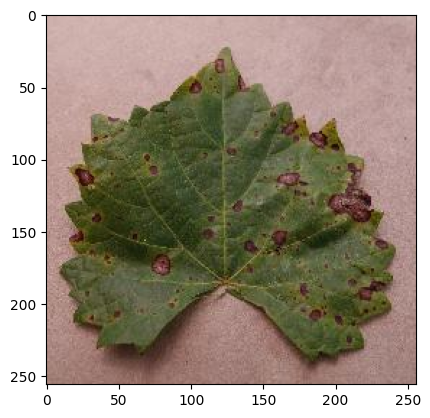

In [2]:
img="/content/41683bde-b97c-487c-b342-ed4cf21d129e___FAM_B.Rot 3017.JPG"
img=cv2.imread(img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

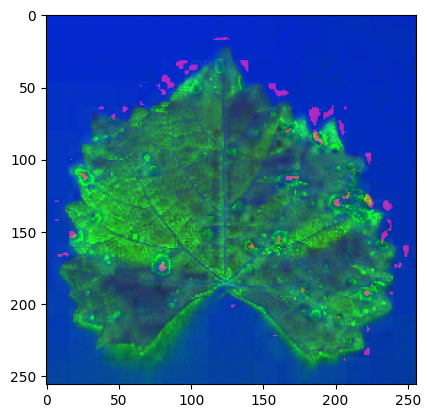

In [3]:
#HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

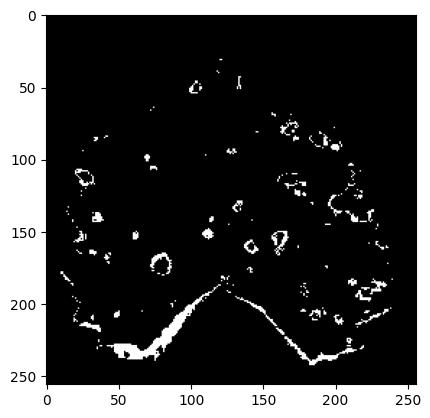

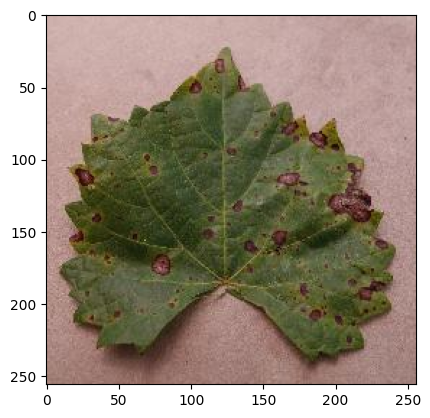

In [4]:
#masking the red regions
mask = cv2.inRange(img_hsv, (6, 63, 0), (23, 255, 81))
#mask2 = cv2.inRange(img_hsv, (170, 100, 20), (180, 255, 255))

#Merge the mask
#mask = cv2.bitwise_or(mask1, mask2)

# Display the masked image
plt.imshow(mask,cmap='gray')
plt.show()
plt.imshow(img)
plt.show()

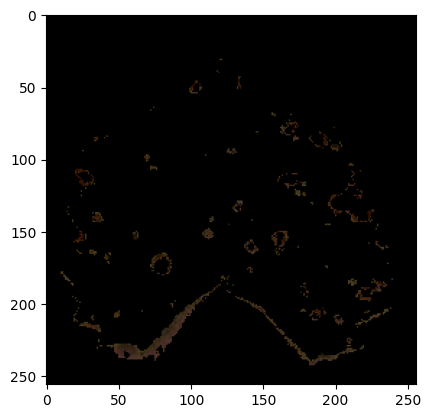

In [5]:
#cropping the mask and displaying the image
croped = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(croped)

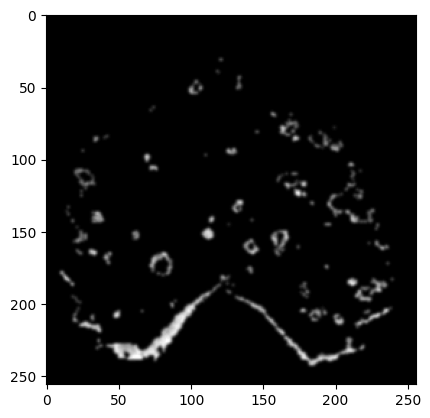

In [6]:
img=croped
imgContour=img.copy()

imgBlur=cv2.GaussianBlur(img,(7,7),1) #blurring the image
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_RGB2GRAY) #converting the image to grayscale

plt.imshow(imgGray,cmap="gray")

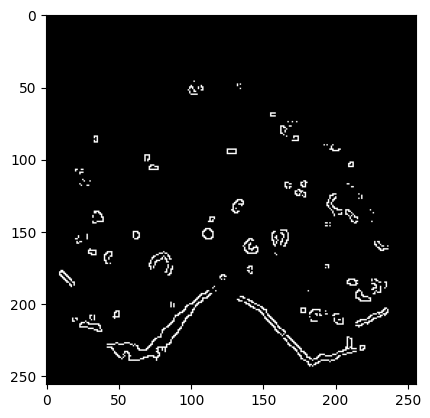

In [7]:
#detecting the edges
imgCanny=cv2.Canny(imgGray,80,80)
kernel=np.ones((5,5))
plt.imshow(imgCanny,cmap='gray')

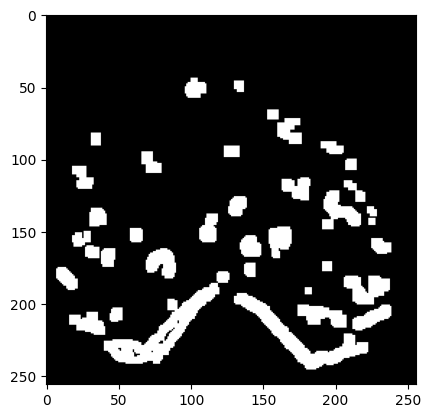

In [9]:
#Dilation is performed to accentuate the features
imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
plt.imshow(imgDil,cmap='gray')

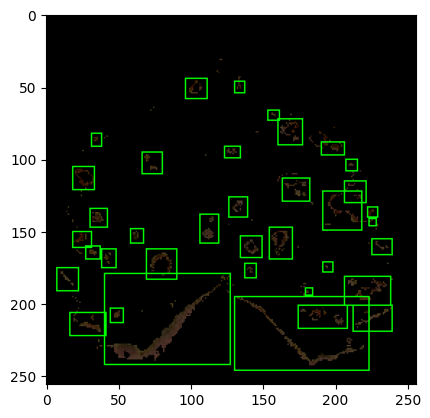

In [10]:
areas=[]
def getContours(img,imgContour):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    img_pixel=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        areas.append(area)
        peri = cv2.arcLength(cnt,True)
        approx= cv2.approxPolyDP(cnt,0.02*peri,True)
        x,y,w,h=cv2.boundingRect(approx)
        cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),1) #drawing bounding box
        #new_img=img1[y:y+h,x:x+w] #cropping the ROI
        #img_pixel.append(new_img)
    #return np.array(img_pixel)

img_pixel=getContours(imgDil,imgContour)
plt.imshow(imgContour)

In [11]:
print(areas)

[231.0, 65.0, 233.0, 302.0, 1010.5, 16.0, 374.0, 1287.0, 141.0, 60.5, 36.0, 276.5, 100.0, 66.5, 103.5, 164.5, 86.0, 70.5, 235.5, 16.0, 172.5, 119.5, 29.0, 127.0, 340.0, 78.5, 199.0, 133.0, 48.5, 120.5, 70.0, 88.0, 48.0, 187.5, 42.0, 38.5, 135.0]


In [12]:
sum(areas)

6851.5